[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/pixeltable/pixeltable/blob/release/docs/release/tutorials/working-with-replicate.ipynb)&nbsp;&nbsp;
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pixeltable/pixeltable/blob/release/docs/release/tutorials/working-with-replicate.ipynb)&nbsp;&nbsp;
<a href="https://raw.githubusercontent.com/pixeltable/pixeltable/release/docs/release/tutorials/working-with-replicate.ipynb" download><img src="https://img.shields.io/badge/%E2%AC%87-Download%20Notebook-blue" alt="Download Notebook"></a>

# Working with Replicate in Pixeltable

Pixeltable's Replicate integration enables you to access Replicate's models via the Replicate API.

### Prerequisites

- A Replicate account with an API token.

### Important Notes

- Replicate usage may incur costs based on your Replicate plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter a Replicate API token.

In [ ]:
%pip install -qU pixeltable replicate

In [ ]:
import os
import getpass

if 'REPLICATE_API_TOKEN' not in os.environ:
    os.environ['REPLICATE_API_TOKEN'] = getpass.getpass('Replicate API Token:')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the `replicate_demo` directory and its contents, if it exists
pxt.drop_dir('replicate_demo', force=True)
pxt.create_dir('replicate_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory `replicate_demo`.


## Chat Completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from Replicate.

In [2]:
from pixeltable.functions.replicate import run

# Create a table in Pixeltable and pick a model hosted on Replicate with some parameters

t = pxt.create_table('replicate_demo.chat', {'prompt': pxt.String})

input = {
    'system_prompt': 'You are a helpful assistant.',
    'prompt': t.prompt,
    # These parameters are optional and can be used to tune model behavior:
    'max_tokens': 300,
    'top_p': 0.9,
    'temperature': 0.8
}
t['output'] = run(input, ref='meta/meta-llama-3-8b-instruct')

Created table `chat`.
Added 0 column values with 0 errors.


In [3]:
# Parse the response into a new column
t['response'] = pxt.functions.string.join('', t.output)

Added 0 column values with 0 errors.


In [4]:
# Start a conversation
t.insert(prompt='What foods are rich in selenium?')
t.select(t.prompt, t.response).show()

Computing cells: 100%|████████████████████████████████████████████| 4/4 [00:04<00:00,  1.11s/ cells]
Inserting rows into `chat`: 1 rows [00:00, 144.97 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 4/4 [00:04<00:00,  1.11s/ cells]
Inserted 1 row with 0 errors.


prompt,response
What foods are rich in selenium?,"Selenium is an essential mineral that plays a crucial role in our body's health, and it's found in various foods. Here are some of the richest sources of selenium: 1. Brazil Nuts: Brazil nuts are one of the highest natural sources of selenium, with a single nut providing about 78 micrograms of selenium, which is more than the recommended daily intake. 2. Fish: Fatty fish like tuna, mackerel, and sardines are excellent sources of selenium. A 3-ounce serving of cooked tuna can provide up to ...... e serving providing about 20-30 micrograms. 5. Turkey: Turkey breast is also a good source of selenium, with a 3-ounce serving providing about 20-30 micrograms. 6. Tofu: Tofu is a good plant-based source of selenium, with a 3-ounce serving providing about 20-30 micrograms. 7. Mushrooms: Certain types of mushrooms, such as shiitake and portobello, are good sources of selenium. A 3-ounce serving of cooked mushrooms can provide up to 20 micrograms of selenium. 8. Eggs: Eggs are a good source of"


## Image Generation

Here's an example that shows how to use Replicate's image generation models with Pixeltable. We'll use the FLUX Schnell model.

In [5]:
from pixeltable.functions.replicate import run

t = pxt.create_table('replicate_demo.images', {'prompt': pxt.String})

input = {
    'prompt': t.prompt,
    'go_fast': True,
    'megapixels': '1'
}
t['output'] = run(input, ref='black-forest-labs/flux-schnell')

Created table `images`.
Added 0 column values with 0 errors.


In [6]:
t.insert(prompt='Draw a pencil sketch of a friendly dinosaur playing tennis in a cornfield.')

Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  2.83 cells/s]
Inserting rows into `images`: 1 rows [00:00, 116.21 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  2.78 cells/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [7]:
t.select(t.prompt, t.output).collect()

prompt,output
Draw a pencil sketch of a friendly dinosaur playing tennis in a cornfield.,"[""data:application/octet-stream;base64,UklGRnjhAABXRUJQVlA4IGzhAACQ8gOdASoABAAEPm00lkikIqIhIzNqQIANiWlu9oz4zm+7UqsD/L5in/16KnIRGH4WxT6Ofx3nqWdXo4Qwf ...... 1pgrNE93FOnmDdgfTf9N8lF6rfTEb3wOZZV6ja5k3n/GnPj/u9QWyaNbeNmFhw7Kt9W1ui6kiHlc+T8p9MHNM2kj6YIjMWkhpbw/9xRcVEg2LX+Tsm8nRgiWjYeo6AhM/ze2UrQjjEP3zAAAA=""]"


We see that Replicate returns our image as an array containing a single string, with a base64-encoded URL of the image. To turn it into an actual image, all we have to do is cast the string to type `pxt.Image`:

prompt,col_1
Draw a pencil sketch of a friendly dinosaur playing tennis in a cornfield.,

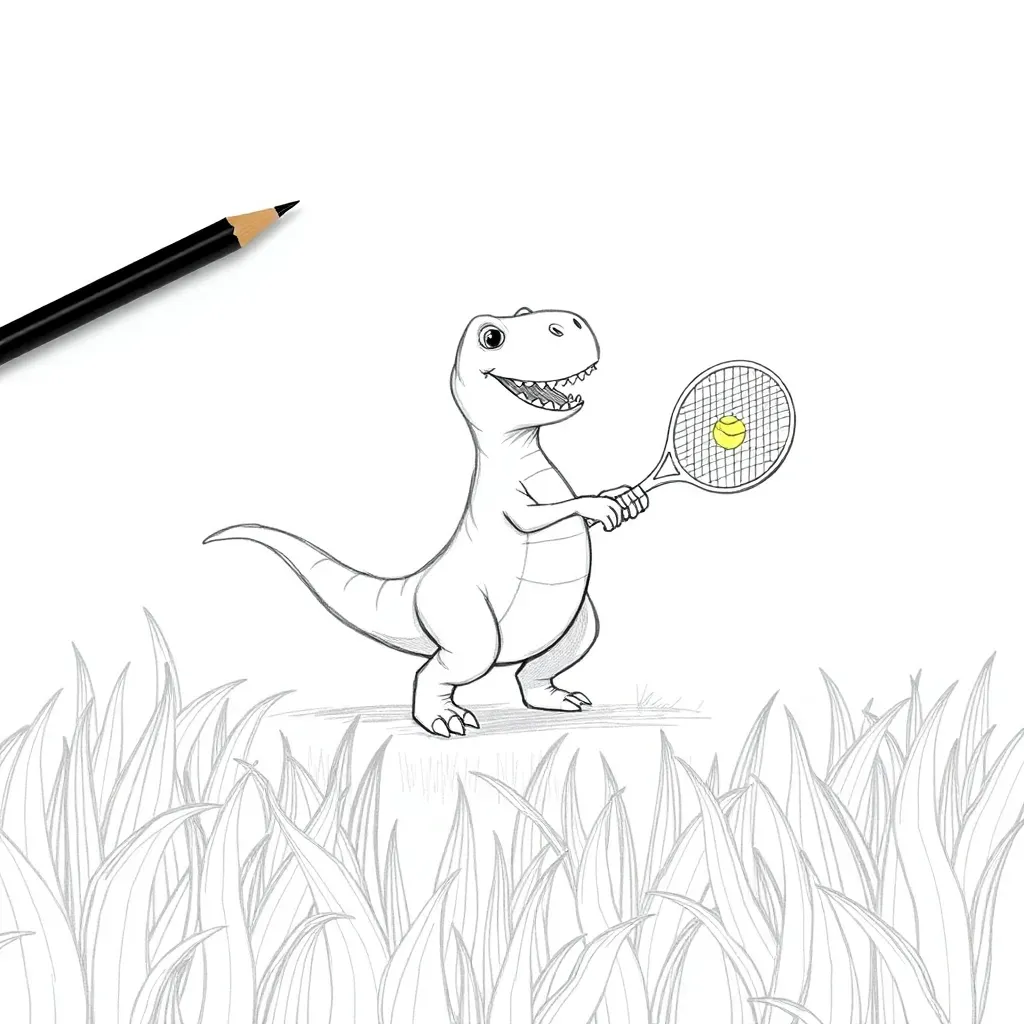

In [8]:
t.select(t.prompt, t.output[0].astype(pxt.Image)).collect()

### Learn More

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://pixeltable.readme.io/docs/rag-operations-in-pixeltable) tutorial.

If you have any questions, don't hesitate to reach out.